<a href="https://colab.research.google.com/github/Omarnot2far/End-to-End-DataScience-project-internship/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/BA_data.csv')


In [5]:
df.drop(columns='Unnamed: 7', inplace=True)

In [11]:
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rating         998 non-null    object
 1   headline       998 non-null    object
 2   author         998 non-null    object
 3   time           998 non-null    object
 4   content        998 non-null    object
 5   location_info  998 non-null    object
 6   trip_verified  998 non-null    object
dtypes: object(7)
memory usage: 62.4+ KB


In [15]:
# change datatype using astype function
df['rating'] = df['rating'].astype(float)
df['time'] = pd.to_datetime(df['time'])
df['trip_verified'] = df['trip_verified'].astype(bool)

<ipython-input-15-d2fc2b22069b>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['time'] = pd.to_datetime(df['time'])


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rating         998 non-null    float64       
 1   headline       998 non-null    object        
 2   author         998 non-null    object        
 3   time           998 non-null    datetime64[ns]
 4   content        998 non-null    object        
 5   location_info  998 non-null    object        
 6   trip_verified  998 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(4)
memory usage: 55.6+ KB


# Sentiment analysis 

**Libraries**

nltk: for natural language processing tasks such as tokenization and stemming

textblob: for sentiment analysis

First, we will perform some basic data cleaning on the 'content' column to remove any unnecessary characters and stopwords. We will also perform tokenization and stemming using the nltk library

In [18]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# download the stopwords corpus if it is not already downloaded
nltk.download('stopwords')

# create an instance of the PorterStemmer
stemmer = PorterStemmer()

# remove stopwords and perform stemming on the 'content' column
stop_words = set(stopwords.words('english'))
df['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word.lower()) for word in word_tokenize(x) if word.lower() not in stop_words]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning the data, we can use the **textblob** library to perform sentiment analysis on each review. The textblob library provides a simple API for performing sentiment analysis

In [19]:
from textblob import TextBlob

# create a new column for sentiment polarity scores
df['polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [20]:
df.head()

,rating,headline,author,time,content,location_info,trip_verified,polarity
0,1.0,most appalling airline service,C Peale,2023-08-05,"never travel british airway . spent $ 10,000 b...",Australia,True,-0.051378
1,1.0,Customer service is shocking,Jason Wickert,2023-06-05,alreadi portug contact today cancel return fli...,United Kingdom,True,-0.150000
2,1.0,Avoid this airline,S Dasirou,2023-06-05,terribl . avoid airlin . ’ becom regular pract...,United Kingdom,True,0.150000
3,2.0,a lot of actual lies being told,Alexander George,2023-01-05,"despit gold member , british airway staff heat...",United Kingdom,True,0.168750
4,5.0,premium price for very average service,G Jones,2023-04-28,regard aircraft seat : busi class seat flight ...,United Kingdom,False,-0.052632


The polarity score ranges from -1 to 1, where a score of -1 indicates negative sentiment, 0 indicates neutral sentiment, and 1 indicates positive sentiment.

we can calculate the average polarity score for **positive, neutral, and negative reviews**, and compare them to identify patterns

In [21]:
# calculate the average polarity score for positive, neutral, and negative reviews
positive_polarity = df[df['polarity'] > 0]['polarity'].mean()
neutral_polarity = df[df['polarity'] == 0]['polarity'].mean()
negative_polarity = df[df['polarity'] < 0]['polarity'].mean()

print("Average polarity score for positive reviews:", positive_polarity)
print("Average polarity score for neutral reviews:", neutral_polarity)
print("Average polarity score for negative reviews:", negative_polarity)


Average polarity score for positive reviews: 0.202040795135842
Average polarity score for neutral reviews: 0.0
Average polarity score for negative reviews: -0.13490546762500993


visualize the distribution of the polarity scores

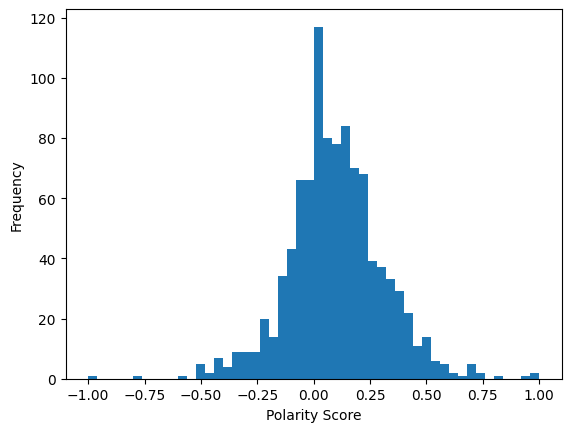

In [22]:
import matplotlib.pyplot as plt

# plot a histogram of the polarity scores
plt.hist(df['polarity'], bins=50)
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()


A **word cloud** is a visualization of the most frequent words in a given text. We can use the WordCloud library to create a word cloud from the reviews.

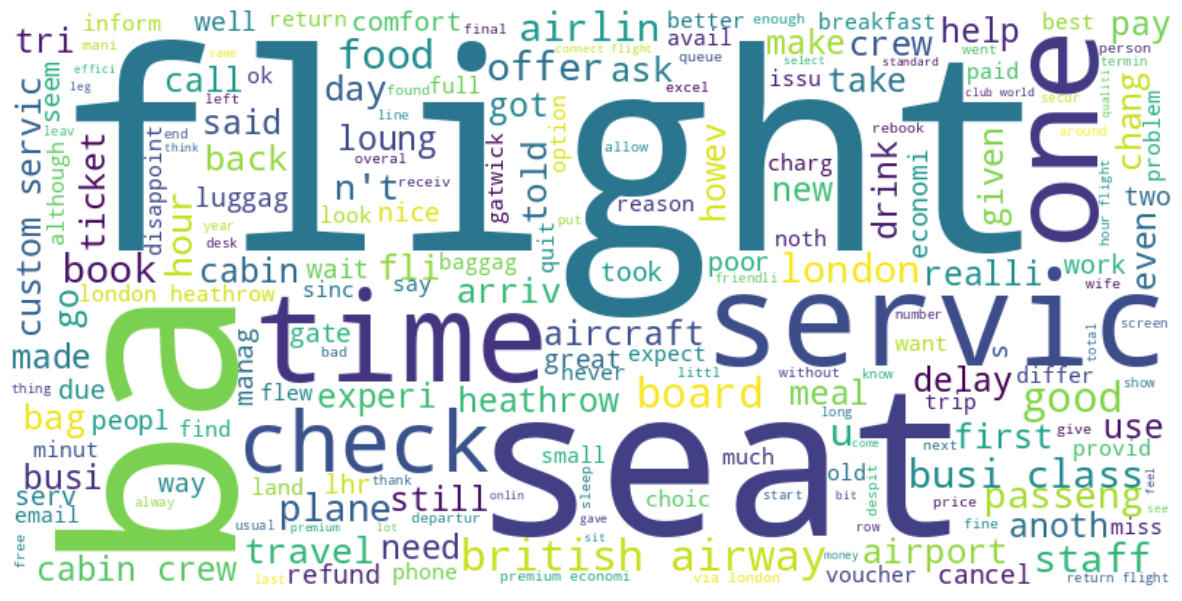

In [23]:
from wordcloud import WordCloud

# Join all the reviews into a single string
all_reviews = ' '.join(df['content'])

# Create a word cloud from the reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
